# 1. Agglomerative Hierarchical Clustering (Bottom-Up Approach)

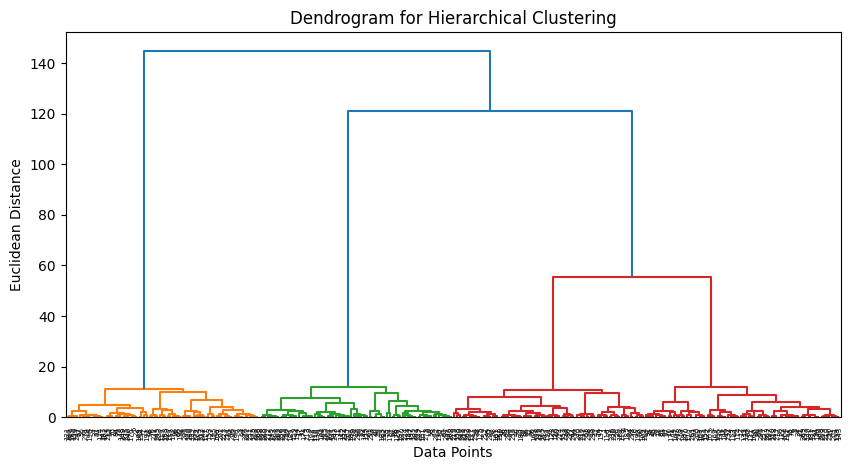

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)

# Plot the dendrogram to determine the number of clusters
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Apply Agglomerative Clustering
n_clusters = 4  # Chosen based on the dendrogram cutoff
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 2. Divisive Hierarchical Clustering (Top-Down Approach)

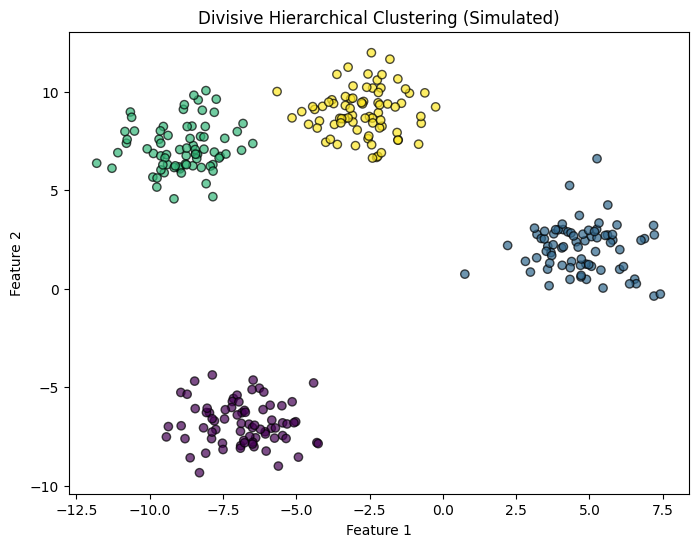

In [6]:
from scipy.cluster.hierarchy import fcluster

# Generate hierarchical clustering linkage matrix
Z = sch.linkage(X, method='ward')

# Cut the dendrogram to form 4 clusters
labels = fcluster(Z, t=4, criterion='maxclust')

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title("Divisive Hierarchical Clustering (Simulated)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 3. Different Linkage Methods in Hierarchical Clustering

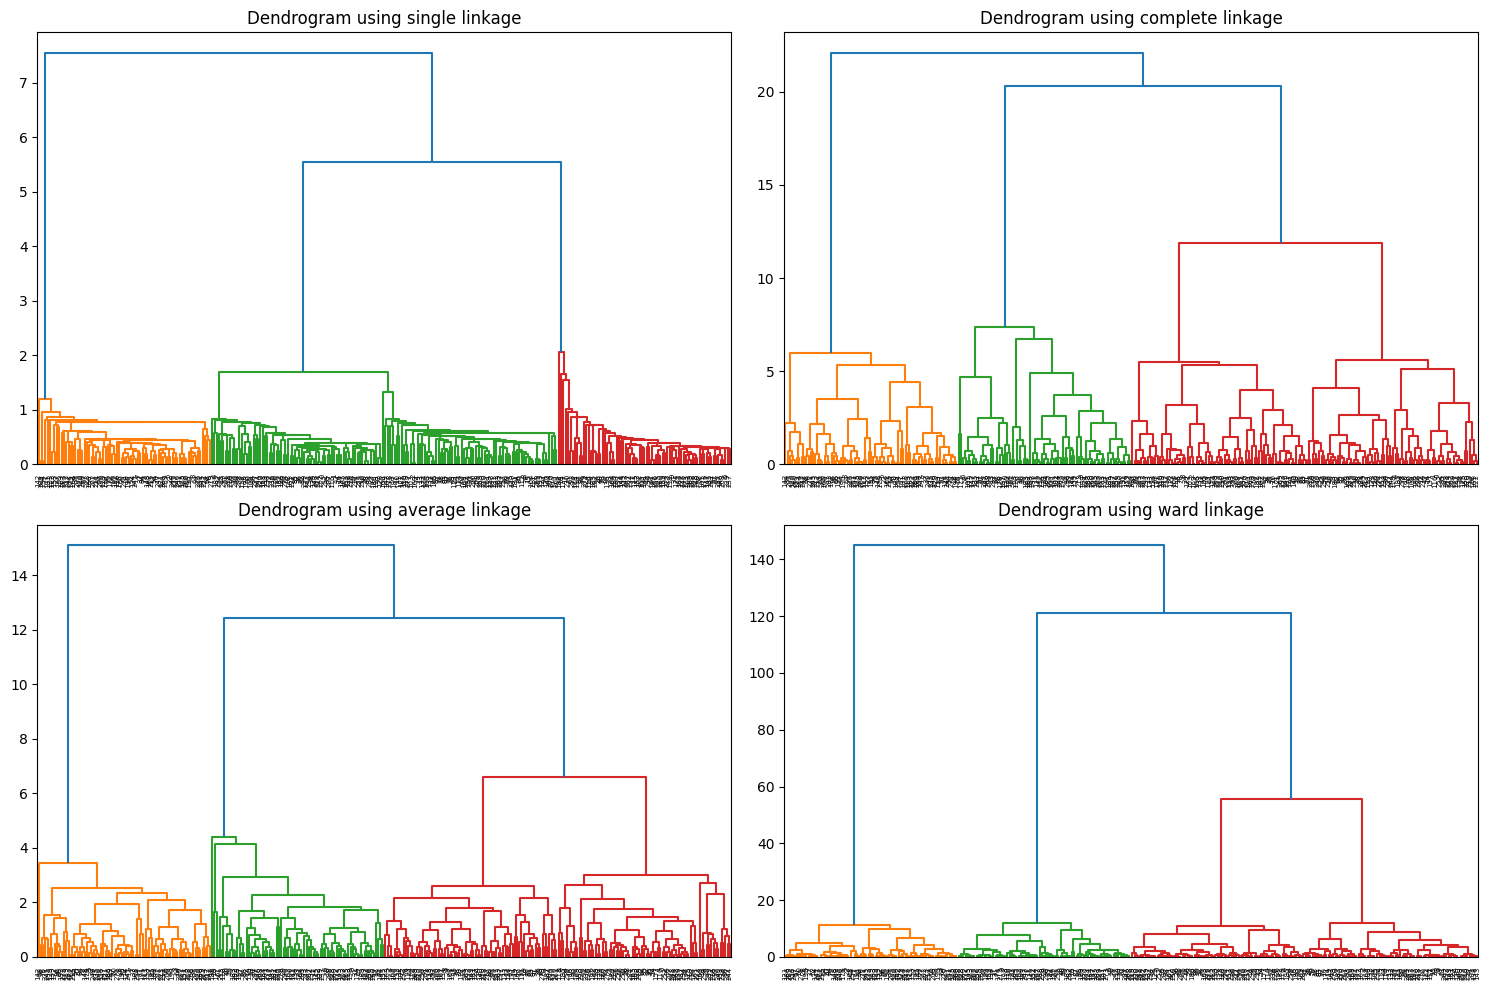

In [7]:
linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title(f"Dendrogram using {method} linkage")

plt.tight_layout()
plt.show()


# 4. How to Determine the Optimal Number of Clusters

In [8]:
from sklearn.metrics import silhouette_score

# Try different cluster numbers
for k in range(2, 6):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for {k} clusters: {score:.3f}")


Silhouette Score for 2 clusters: 0.577
Silhouette Score for 3 clusters: 0.735
Silhouette Score for 4 clusters: 0.752
Silhouette Score for 5 clusters: 0.658
